#0. Importando Base de Dados de pasta do Google Drive

- Importando pasta .zip do Google Drive

In [ ]:
#from urllib import request
#file_url = 'https://drive.google.com/uc?export=download&id=10-Q4DvL5vMOwmEK0-gLESQiQczjTYn4H'
#file = 'data.zip'
#request.urlretrieve(file_url , file )

- Descompactando a pasta

In [ ]:
#!unzip data.zip

- Apagando o arquivo .zip

In [ ]:
#!rm -rf data.zip

#1. Fazendo a Análise comparando dados do Giroscópio: "Movimento das Mãos Com Tremores com o Corpo em Repouso x Movimento das Mãos Sem Tremores com o Corpo em Repouso"

#Célula 1: Importação de bibliotecas e leitura dos dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

In [ ]:
# Carregar os dados do giroscópio de uma tabela xls de movimentos  das mãoes sem tremedeira com o corpo parado
dt1_maos_sem_tremores = pd.read_excel('/content/data/sprint 2/giroscopio/2-maos_sem_tremores(testes)/1_5141419734163522635.xls')
tempo_dt1_maos_sem_tremores = dt1_maos_sem_tremores['Time (s)']
resultados_abs_dt1_maos_sem_tremores =  dt1_maos_sem_tremores['Absolute (rad/s)']

# Carregar os dados do giroscópio de uma tabela xls de movimentos das mãoes com tremedeira com o corpo parado
dt1_maos_com_tremores = pd.read_excel('/content/data/sprint 2/giroscopio/1-maos_com_tremores(testes)/1_5140919877279679216.xls')
tempo_dt1_maos_com_tremores = dt1_maos_com_tremores['Time (s)']
resultados_abs_dt1_maos_com_tremores = dt1_maos_com_tremores['Absolute (rad/s)']

#Célula 2: Plot das séries temporais das tabelas de dados sem e com tremedeira

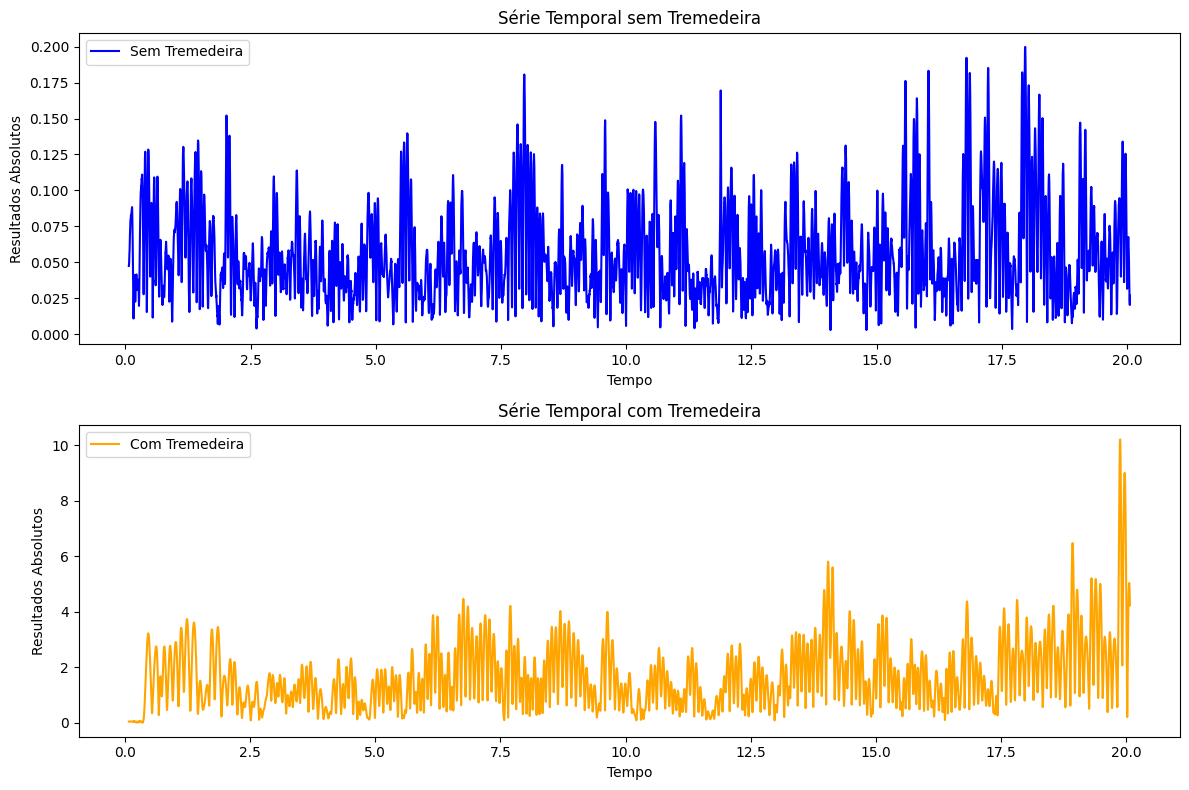

In [ ]:
# Plot das séries temporais das tabelas de dados sem e com tremedeira
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(tempo_dt1_maos_sem_tremores, resultados_abs_dt1_maos_sem_tremores, label='Sem Tremedeira', color='blue')
plt.xlabel('Tempo')
plt.ylabel('Resultados Absolutos')
plt.title('Série Temporal sem Tremedeira')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(tempo_dt1_maos_com_tremores, resultados_abs_dt1_maos_com_tremores, label='Com Tremedeira', color='orange')
plt.xlabel('Tempo')
plt.ylabel('Resultados Absolutos')
plt.title('Série Temporal com Tremedeira')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Detectar picos nas séries temporais
peaks_no_tremor, _ = find_peaks(resultados_abs_dt1_maos_sem_tremores, distance=50)
peaks_tremor, _ = find_peaks(resultados_abs_dt1_maos_com_tremores, distance=50)

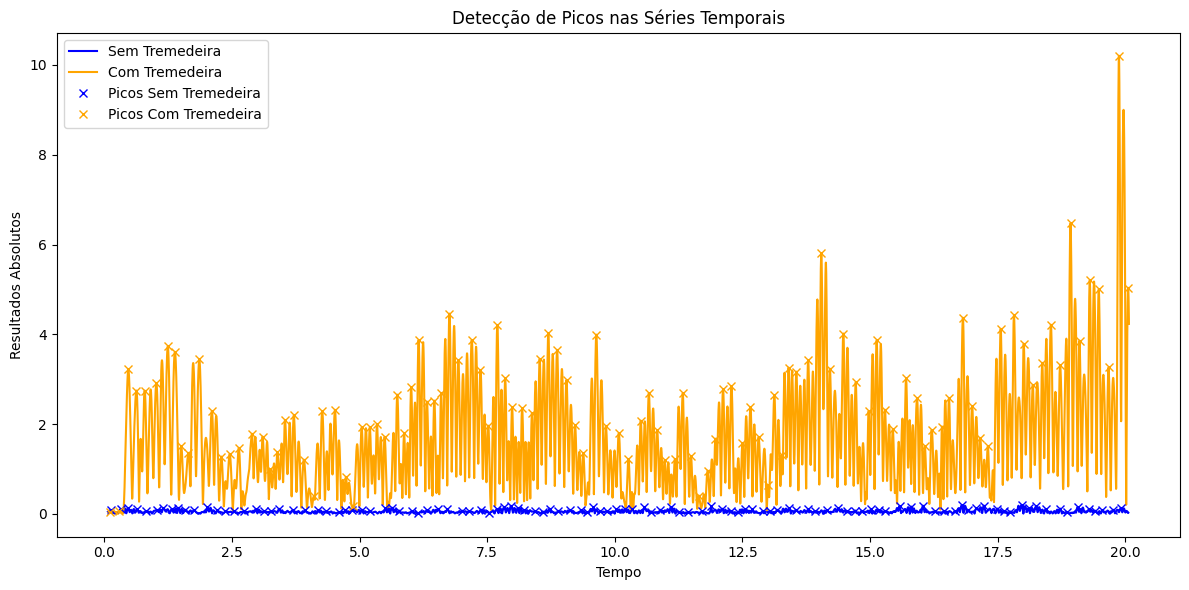

In [ ]:
# Plot das séries temporais com picos detectados
plt.figure(figsize=(12, 6))

plt.plot(tempo_dt1_maos_sem_tremores, resultados_abs_dt1_maos_sem_tremores, label='Sem Tremedeira', color='blue')
plt.plot(tempo_dt1_maos_com_tremores, resultados_abs_dt1_maos_com_tremores, label='Com Tremedeira', color='orange')

plt.plot(tempo_dt1_maos_sem_tremores[peaks_no_tremor], resultados_abs_dt1_maos_sem_tremores[peaks_no_tremor], 'x', color='blue', label='Picos Sem Tremedeira')
plt.plot(tempo_dt1_maos_com_tremores[peaks_tremor], resultados_abs_dt1_maos_com_tremores[peaks_tremor], 'x', color='orange', label='Picos Com Tremedeira')

plt.xlabel('Tempo')
plt.ylabel('Resultados Absolutos')
plt.title('Detecção de Picos nas Séries Temporais')
plt.legend()

plt.tight_layout()
plt.show()


#Célula 5: Filtro de Limiar de Tremor

#1. Análise dos Dados Sem Tremor:
Primeiro, você precisa analisar os dados que são considerados normais, ou seja, sem tremor. Isso pode ser feito calculando estatísticas descritivas dos "resultados absolutos" nessas condições. Por exemplo, você pode calcular a média e o desvio padrão dos resultados absolutos quando não há tremor.

#2. Estabelecimento do Limiar:
Com base nas estatísticas calculadas no passo anterior, você pode definir um limiar que indique quando um tremor é detectado. Isso pode ser feito adicionando uma certa quantidade de desvios padrão à média dos dados sem tremor. Isso criará uma faixa em torno dos valores normais, e qualquer valor fora dessa faixa pode ser considerado como tremor.

#3. Aplicação do Limiar:
Agora você pode comparar os "resultados absolutos" com o limiar estabelecido. Valores acima do limiar indicarão tremor. Você pode criar uma coluna adicional na tabela para indicar se o tremor foi detectado ou não com base nessa comparação.

#Criteiros do Limiar:
O critério de estabelecer o limiar como 2 desvios padrão acima da média é uma abordagem comum que é frequentemente utilizada para identificar valores que se destacam significativamente de uma distribuição de dados. Vamos explicar de forma didática o que é desvio padrão e por que usá-lo nesse contexto pode ser uma boa escolha.

- O que é:
O desvio padrão é uma medida estatística que indica o quanto os valores de um conjunto de dados se afastam da média. Em outras palavras, ele mede a dispersão ou variabilidade dos valores em relação à média. Um desvio padrão maior indica que os valores estão mais espalhados em torno da média, enquanto um menor indica que os valores estão mais próximos da média.

- Por que usar:
Quando lidamos com séries temporais ou conjuntos de dados que representam fenômenos naturais, como o movimento das mãos, é comum que os dados variem. O desvio padrão nos ajuda a entender a amplitude dessa variação e a identificar o quão diferentes valores individuais podem ser em relação à média.

- Critério do Limiar:
Ao estabelecer um limiar para detecção de tremores, o uso do desvio padrão pode ser uma escolha sensata porque nos permite considerar o quão incomuns ou anômalos são os valores. Usar um limiar baseado em desvios padrão acima da média pode ajudar a capturar eventos que são mais significativos e menos prováveis de ocorrer simplesmente devido à variação natural.

#Informações Úteis:
No contexto de detecção de tremores, um limiar estabelecido como 2 desvios padrão acima da média significa que estamos considerando como "sinais de tremor significativo" aqueles que estão relativamente distantes da média, o que provavelmente indicaria uma atividade mais intensa ou anômala em comparação com o padrão. Isso ajuda a filtrar as flutuações normais nos dados e a detectar movimentos que são verdadeiramente excepcionais.

A escolha do limiar também depende das características específicas dos dados e das necessidades da análise. Um limiar mais alto, como 3 desvios padrão, seria mais restritivo e identificaria apenas os eventos mais extremos, enquanto um limiar menor seria mais inclusivo, mas poderia incluir mais variações normais. É uma decisão que deve ser tomada com base na natureza dos dados e no objetivo da análise.


Limiar de Tremor: 0.12178661826739932




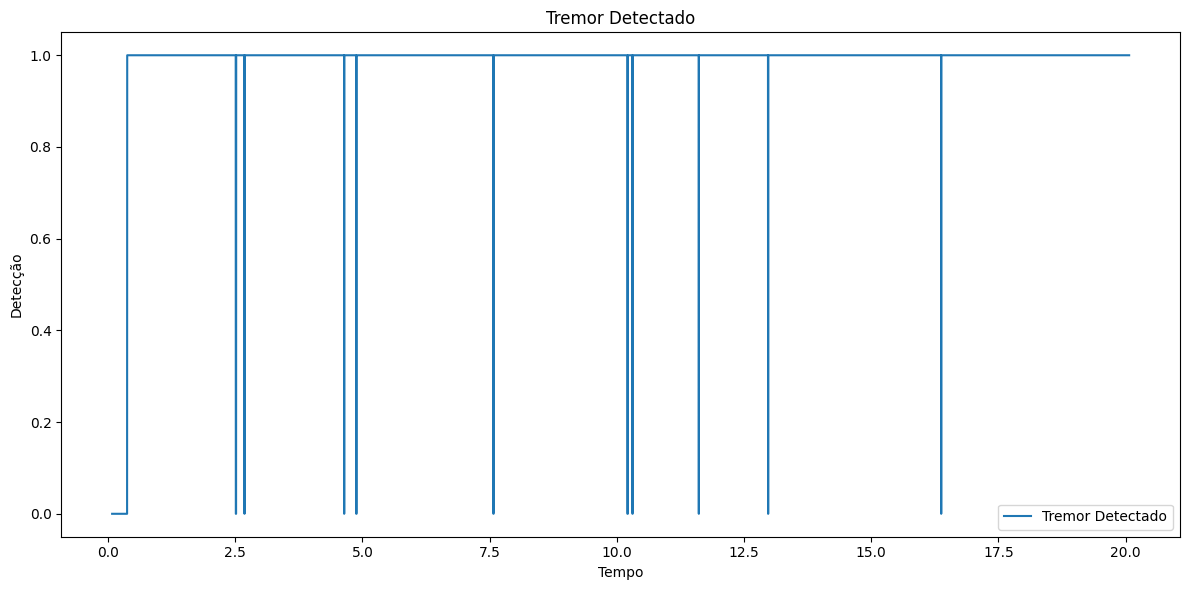

In [ ]:
# Calcular a média e o desvio padrão dos resultados absolutos sem tremor
media_dt1_maos_sem_tremores = resultados_abs_dt1_maos_sem_tremores.mean()
desvio_padrao_dt1_maos_sem_tremores = resultados_abs_dt1_maos_sem_tremores.std()

# Estabelecer o limiar (por exemplo, 2 desvios padrão acima da média)
limiar_de_tremor_dt1 = media_dt1_maos_sem_tremores + 2 * desvio_padrao_dt1_maos_sem_tremores

# Filtro para detecção de tremor
def filtro_de_tremor_dt1(data, threshold):
    deteccao_de_tremor_dt1 = np.abs(data) > threshold
    return deteccao_de_tremor_dt1

# Aplicação do filtro aos dados com tremor
deteccao_de_tremor_dt1 = filtro_de_tremor_dt1(resultados_abs_dt1_maos_com_tremores, limiar_de_tremor_dt1)

# Print do Limiar
print("Limiar de Tremor:", limiar_de_tremor_dt1)
print("\n")

plt.figure(figsize=(12, 6))

# Plot dos resultados

plt.plot(tempo_dt1_maos_com_tremores, deteccao_de_tremor_dt1, label='Tremor Detectado')
plt.xlabel('Tempo')
plt.ylabel('Detecção')
plt.title('Tremor Detectado')
plt.legend()

plt.tight_layout()
plt.show()

#Comportamento Esperado do Gráfico de Detecção de Tremores:
O gráfico de detecção de tremores exibirá uma série de valores booleanos representando a detecção de tremores ao longo do tempo. Cada ponto no gráfico corresponderá a um ponto de tempo nos resultados absolutos dos movimentos com tremor. Se o valor correspondente na série deteccao_de_tremor_dt1 for True, esse ponto no gráfico será marcado de alguma forma para indicar a detecção de tremor; caso contrário, o ponto não será marcado.

# Interpretação do Gráfico:

- Pontos marcados como True indicam que um tremor significativo foi detectado naquele ponto de tempo.
- Pontos não marcados (correspondendo a False) indicam a ausência de tremor significativo naquele ponto de tempo.
- O gráfico ajuda a visualizar os momentos em que o tremor foi detectado em relação ao tempo.




#2. Fazendo a Análise comparando dados do Giroscópio: "Movimento das Mãos Com Tremores (Caminhando) x Movimento das Mãos Sem Tremores (Caminhando)"

#Célula 1: Leitura dos dados

In [ ]:
# Carregar os dados do giroscópio de uma tabela xls de movimentos das mãoes sem tremedeira com o corpo caminhando devagar
dt2_maos_sem_tremores = pd.read_excel('/content/data/sprint 2/giroscopio/4-caminhada_leve_sem_tremores(teste)/1_5143671533977207697.xls')
tempo_dt2_maos_sem_tremores = dt2_maos_sem_tremores['Time (s)']
resultados_abs_dt2_maos_sem_tremores =  dt2_maos_sem_tremores['Absolute (rad/s)']

# Carregar os dados do giroscópio de uma tabela xls de movimentos das mãoes com tremedeira com o corpo caminhando devagar
dt2_maos_com_tremores = pd.read_excel('/content/data/sprint 2/giroscopio/3-caminhada_leve_tremendo(teste)/Giroscpio taxa de rotao 2023-08-27 15-03-28.xls')
tempo_dt2_maos_com_tremores = dt2_maos_com_tremores['Time (s)']
resultados_abs_dt2_maos_com_tremores = dt2_maos_com_tremores['Absolute (rad/s)']


#Célula 2: Plot das séries temporais das tabelas de dados sem e com tremedeira

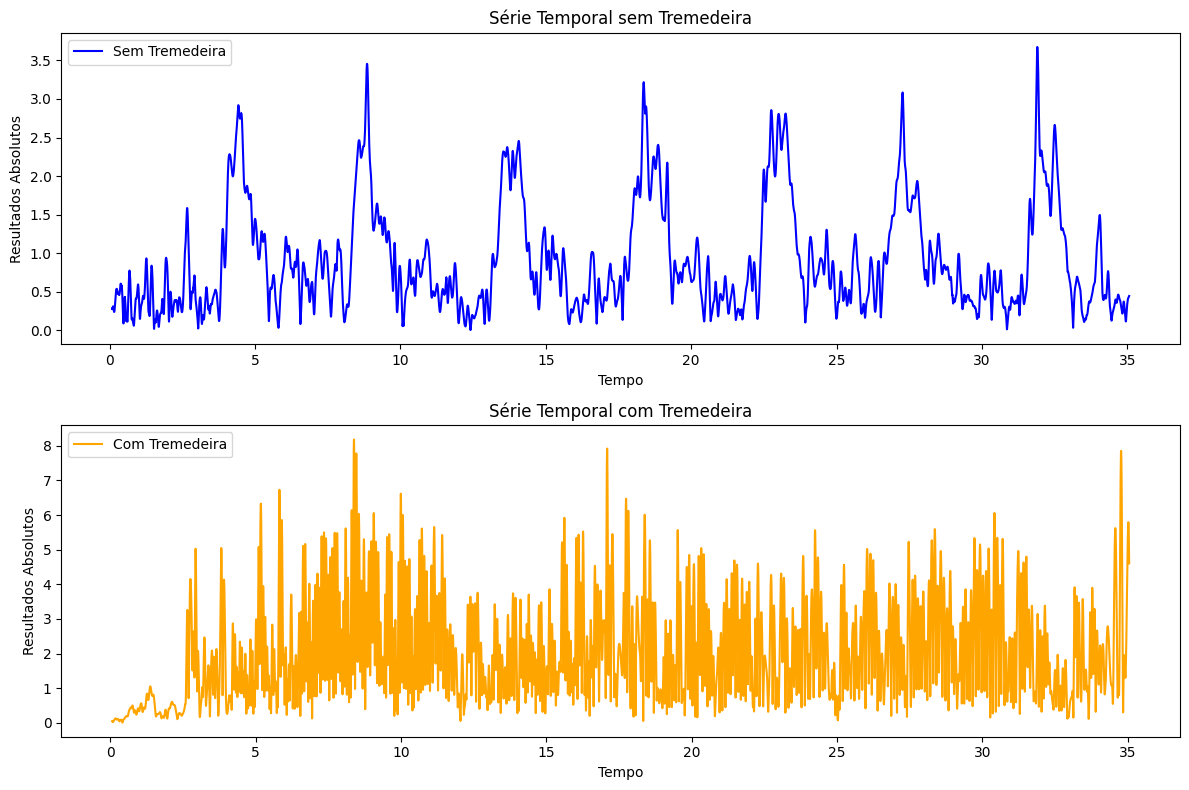

In [ ]:
# Plot das séries temporais das tabelas de dados sem e com tremedeira
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(tempo_dt2_maos_sem_tremores, resultados_abs_dt2_maos_sem_tremores, label='Sem Tremedeira', color='blue')
plt.xlabel('Tempo')
plt.ylabel('Resultados Absolutos')
plt.title('Série Temporal sem Tremedeira')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(tempo_dt2_maos_com_tremores, resultados_abs_dt2_maos_com_tremores, label='Com Tremedeira', color='orange')
plt.xlabel('Tempo')
plt.ylabel('Resultados Absolutos')
plt.title('Série Temporal com Tremedeira')
plt.legend()

plt.tight_layout()
plt.show()

#Célula 3: Detectar picos nas séries temporais

In [ ]:
# Detectar picos nas séries temporais
peaks_no_tremor, _ = find_peaks(resultados_abs_dt2_maos_sem_tremores, distance=50)
peaks_tremor, _ = find_peaks(resultados_abs_dt2_maos_com_tremores, distance=50)

#Célula 4: Plot das séries temporais com picos detectados

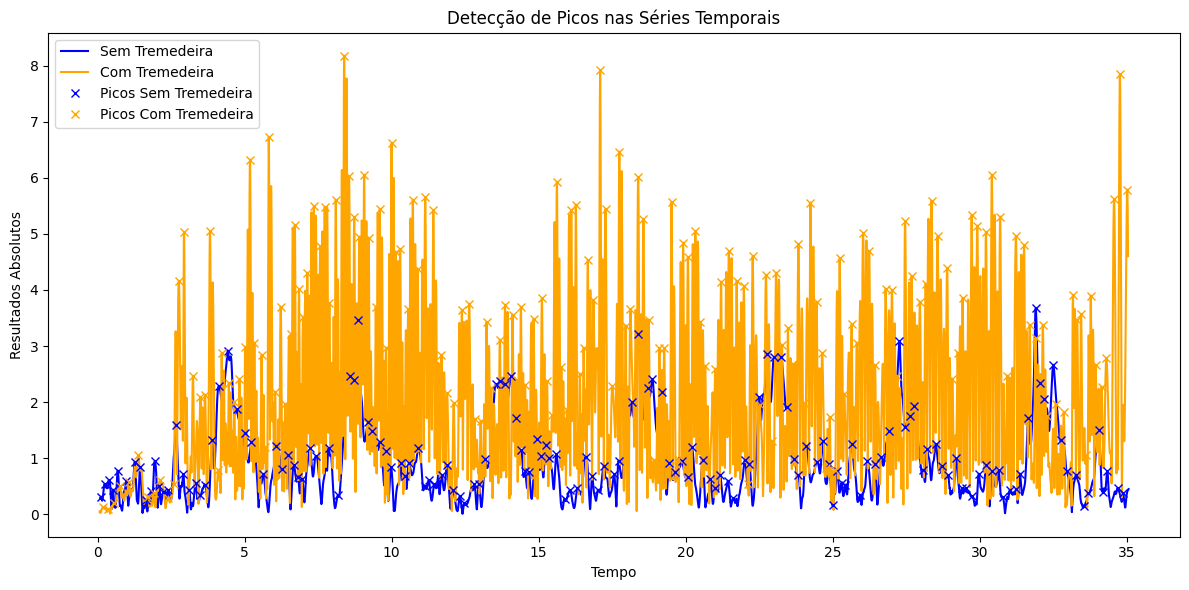

In [ ]:
# Plot das séries temporais com picos detectados
plt.figure(figsize=(12, 6))

plt.plot(tempo_dt2_maos_sem_tremores, resultados_abs_dt2_maos_sem_tremores, label='Sem Tremedeira', color='blue')
plt.plot(tempo_dt2_maos_com_tremores, resultados_abs_dt2_maos_com_tremores, label='Com Tremedeira', color='orange')

plt.plot(tempo_dt2_maos_sem_tremores[peaks_no_tremor], resultados_abs_dt2_maos_sem_tremores[peaks_no_tremor], 'x', color='blue', label='Picos Sem Tremedeira')
plt.plot(tempo_dt2_maos_com_tremores[peaks_tremor], resultados_abs_dt2_maos_com_tremores[peaks_tremor], 'x', color='orange', label='Picos Com Tremedeira')

plt.xlabel('Tempo')
plt.ylabel('Resultados Absolutos')
plt.title('Detecção de Picos nas Séries Temporais')
plt.legend()

plt.tight_layout()
plt.show()

#Célula 5: Filtro de Limiar de Tremor

Limiar de Tremor: 2.30875075628988




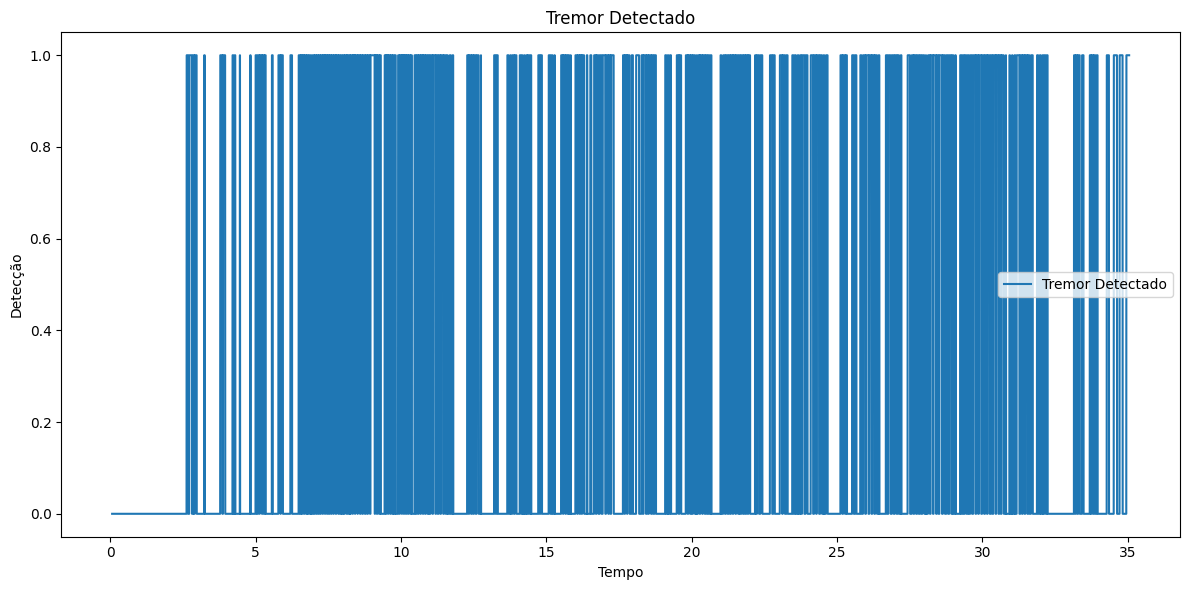

In [ ]:
# Calcular a média e o desvio padrão dos resultados absolutos sem tremor
media_dt2_maos_sem_tremores = resultados_abs_dt2_maos_sem_tremores.mean()
desvio_padrao_dt2_maos_sem_tremores = resultados_abs_dt2_maos_sem_tremores.std()

# Estabelecer o limiar (por exemplo, 2 desvios padrão acima da média)
limiar_de_tremor_dt2 = media_dt2_maos_sem_tremores + 2 * desvio_padrao_dt2_maos_sem_tremores

# Filtro para detecção de tremor
def filtro_de_tremor_dt2(data, threshold):
    deteccao_de_tremor_dt2 = np.abs(data) > threshold
    return deteccao_de_tremor_dt2

# Aplicação do filtro aos dados com tremor
deteccao_de_tremor_dt2 = filtro_de_tremor_dt2(resultados_abs_dt2_maos_com_tremores, limiar_de_tremor_dt2)

# Print do Limiar
print("Limiar de Tremor:", limiar_de_tremor_dt2)
print("\n")

plt.figure(figsize=(12, 6))

# Plot dos resultados

plt.plot(tempo_dt2_maos_com_tremores, deteccao_de_tremor_dt2, label='Tremor Detectado')
plt.xlabel('Tempo')
plt.ylabel('Detecção')
plt.title('Tremor Detectado')
plt.legend()

plt.tight_layout()
plt.show()